In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("heart.csv")

In [3]:
df= df.drop(['oldpeak','slp','thall'],axis=1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [4]:
df.shape
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [5]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

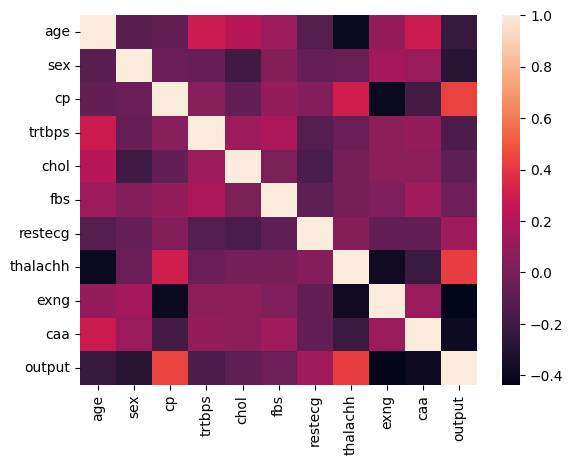

In [6]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

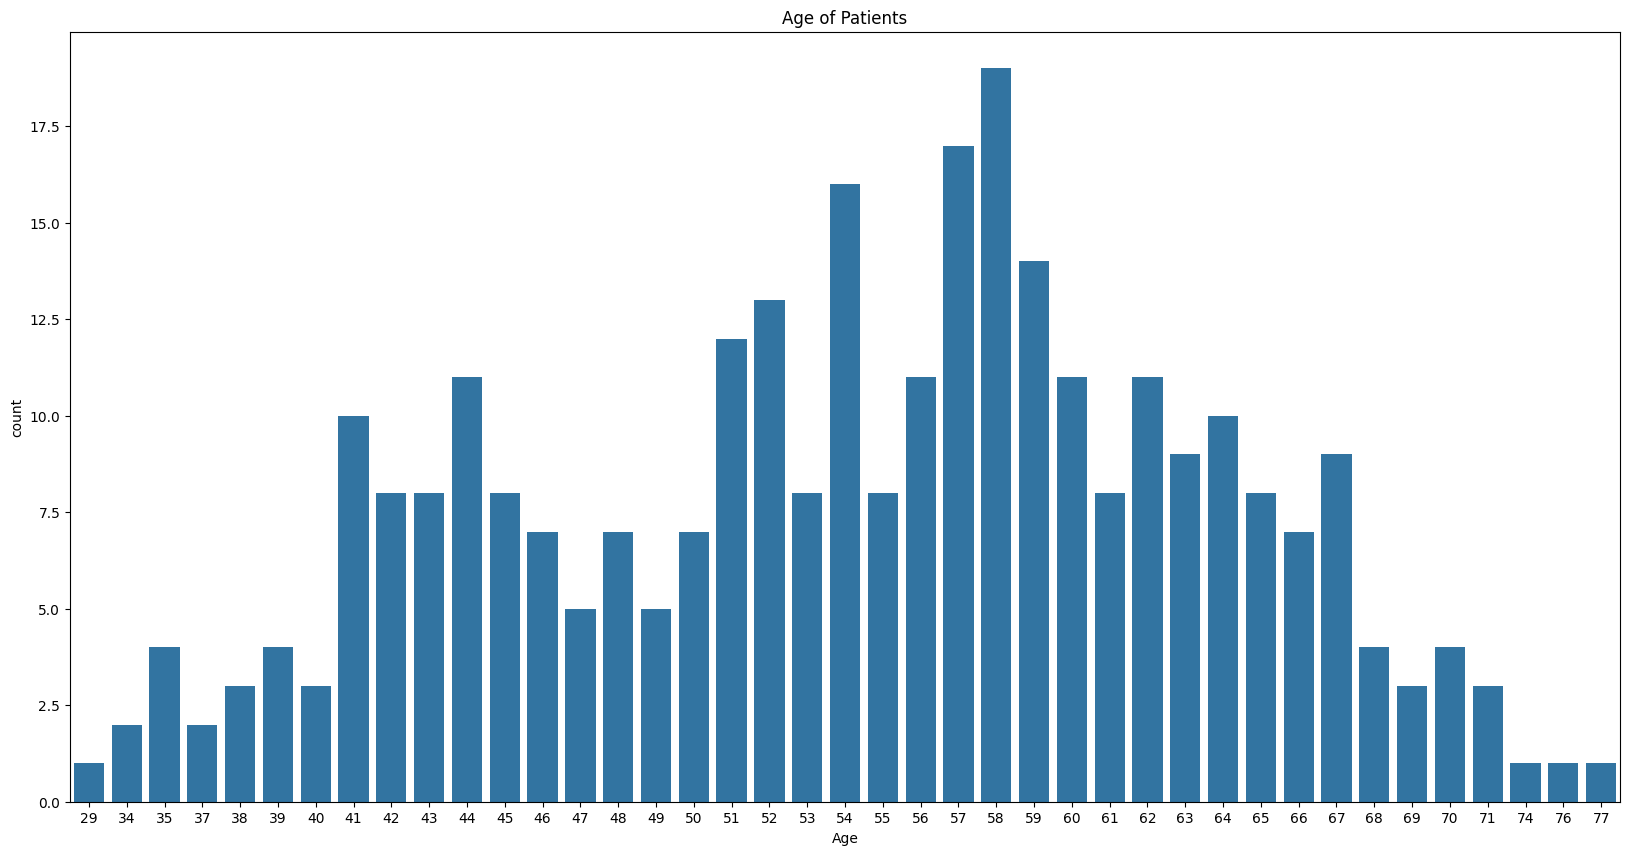

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

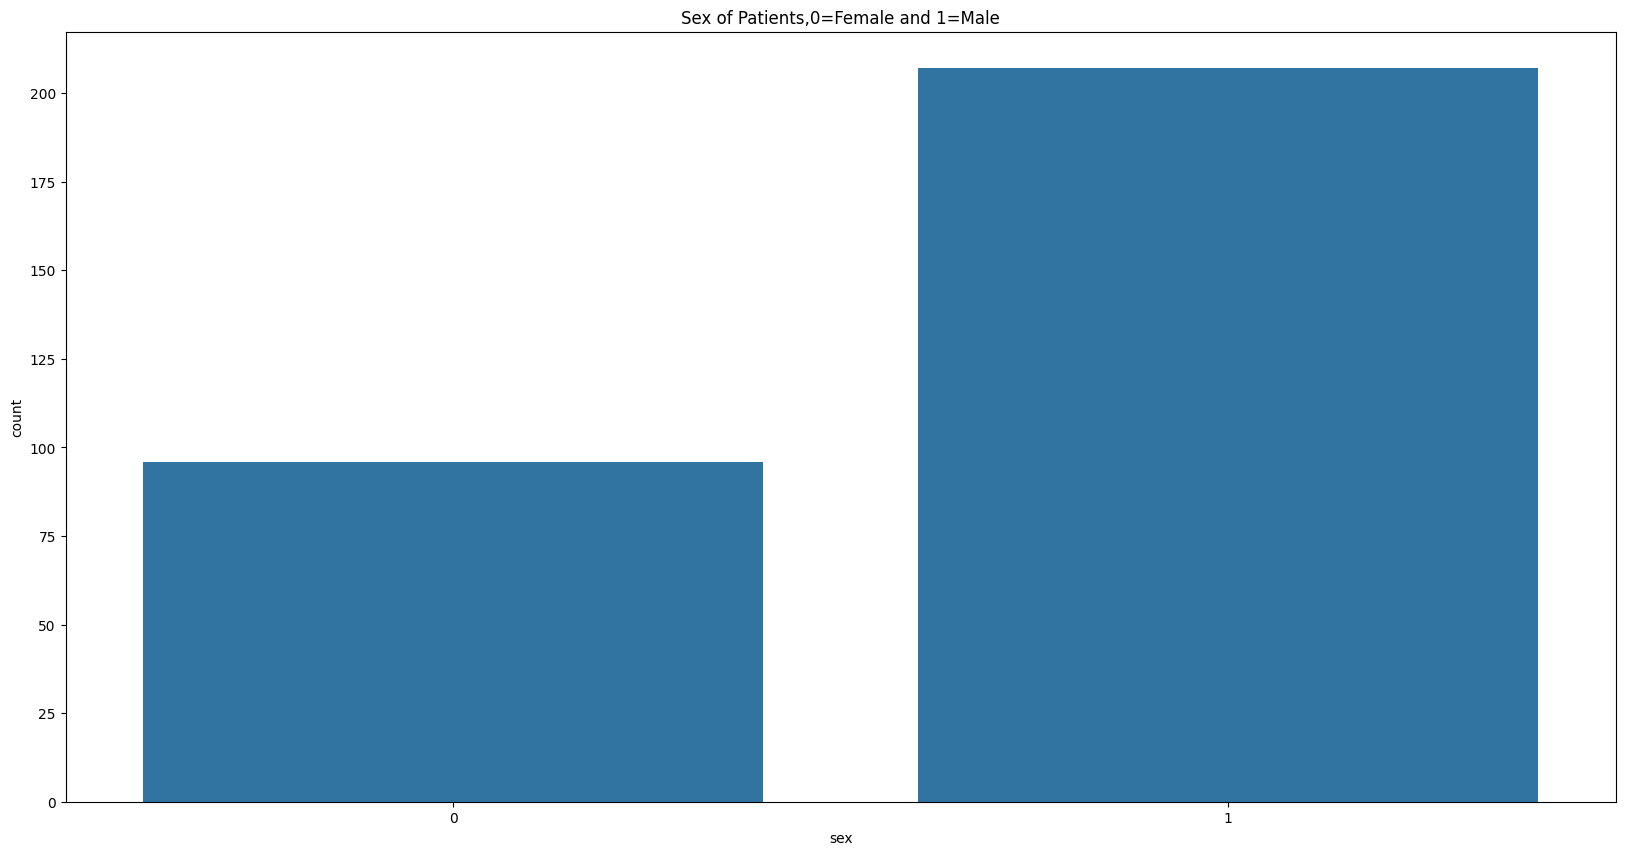

In [8]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

C:\Users\ttbon\AppData\Local\Temp\ipykernel_1160\140308555.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'asymptomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cp_data.loc[cp_data['cp_type'] == 3, 'cp_type'] = 'asymptomatic'


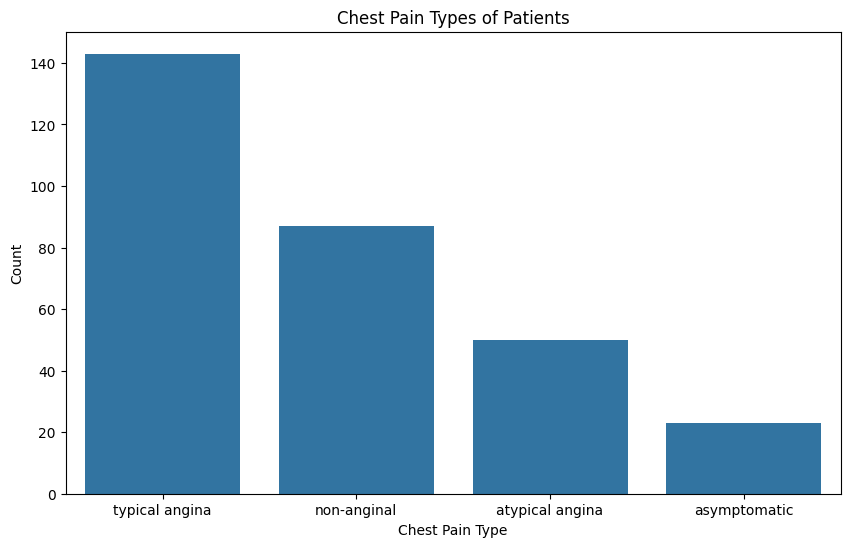

In [9]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp_type', 'count']

# Assigning descriptive labels
cp_data.loc[cp_data['cp_type'] == 3, 'cp_type'] = 'asymptomatic'
cp_data.loc[cp_data['cp_type'] == 2, 'cp_type'] = 'non-anginal'
cp_data.loc[cp_data['cp_type'] == 1, 'cp_type'] = 'atypical angina'
cp_data.loc[cp_data['cp_type'] == 0, 'cp_type'] = 'typical angina'

plt.figure(figsize=(10, 6))
plt.title("Chest Pain Types of Patients")
sns.barplot(x=cp_data['cp_type'], y=cp_data['count'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

C:\Users\ttbon\AppData\Local\Temp\ipykernel_1160\3170031922.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ecg_data.loc[ecg_data['ecg_type'] == 0, 'ecg_type'] = 'normal'


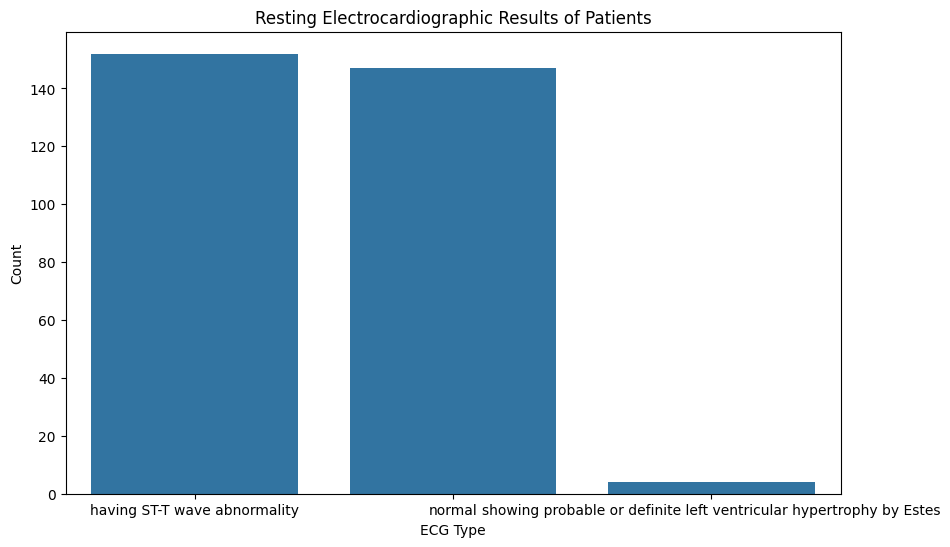

In [10]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['ecg_type', 'count']

# Assigning descriptive labels
ecg_data.loc[ecg_data['ecg_type'] == 0, 'ecg_type'] = 'normal'
ecg_data.loc[ecg_data['ecg_type'] == 1, 'ecg_type'] = 'having ST-T wave abnormality'
ecg_data.loc[ecg_data['ecg_type'] == 2, 'ecg_type'] = 'showing probable or definite left ventricular hypertrophy by Estes'

plt.figure(figsize=(10, 6))
plt.title("Resting Electrocardiographic Results of Patients")
sns.barplot(x=ecg_data['ecg_type'], y=ecg_data['count'])
plt.xlabel('ECG Type')
plt.ylabel('Count')
plt.show()

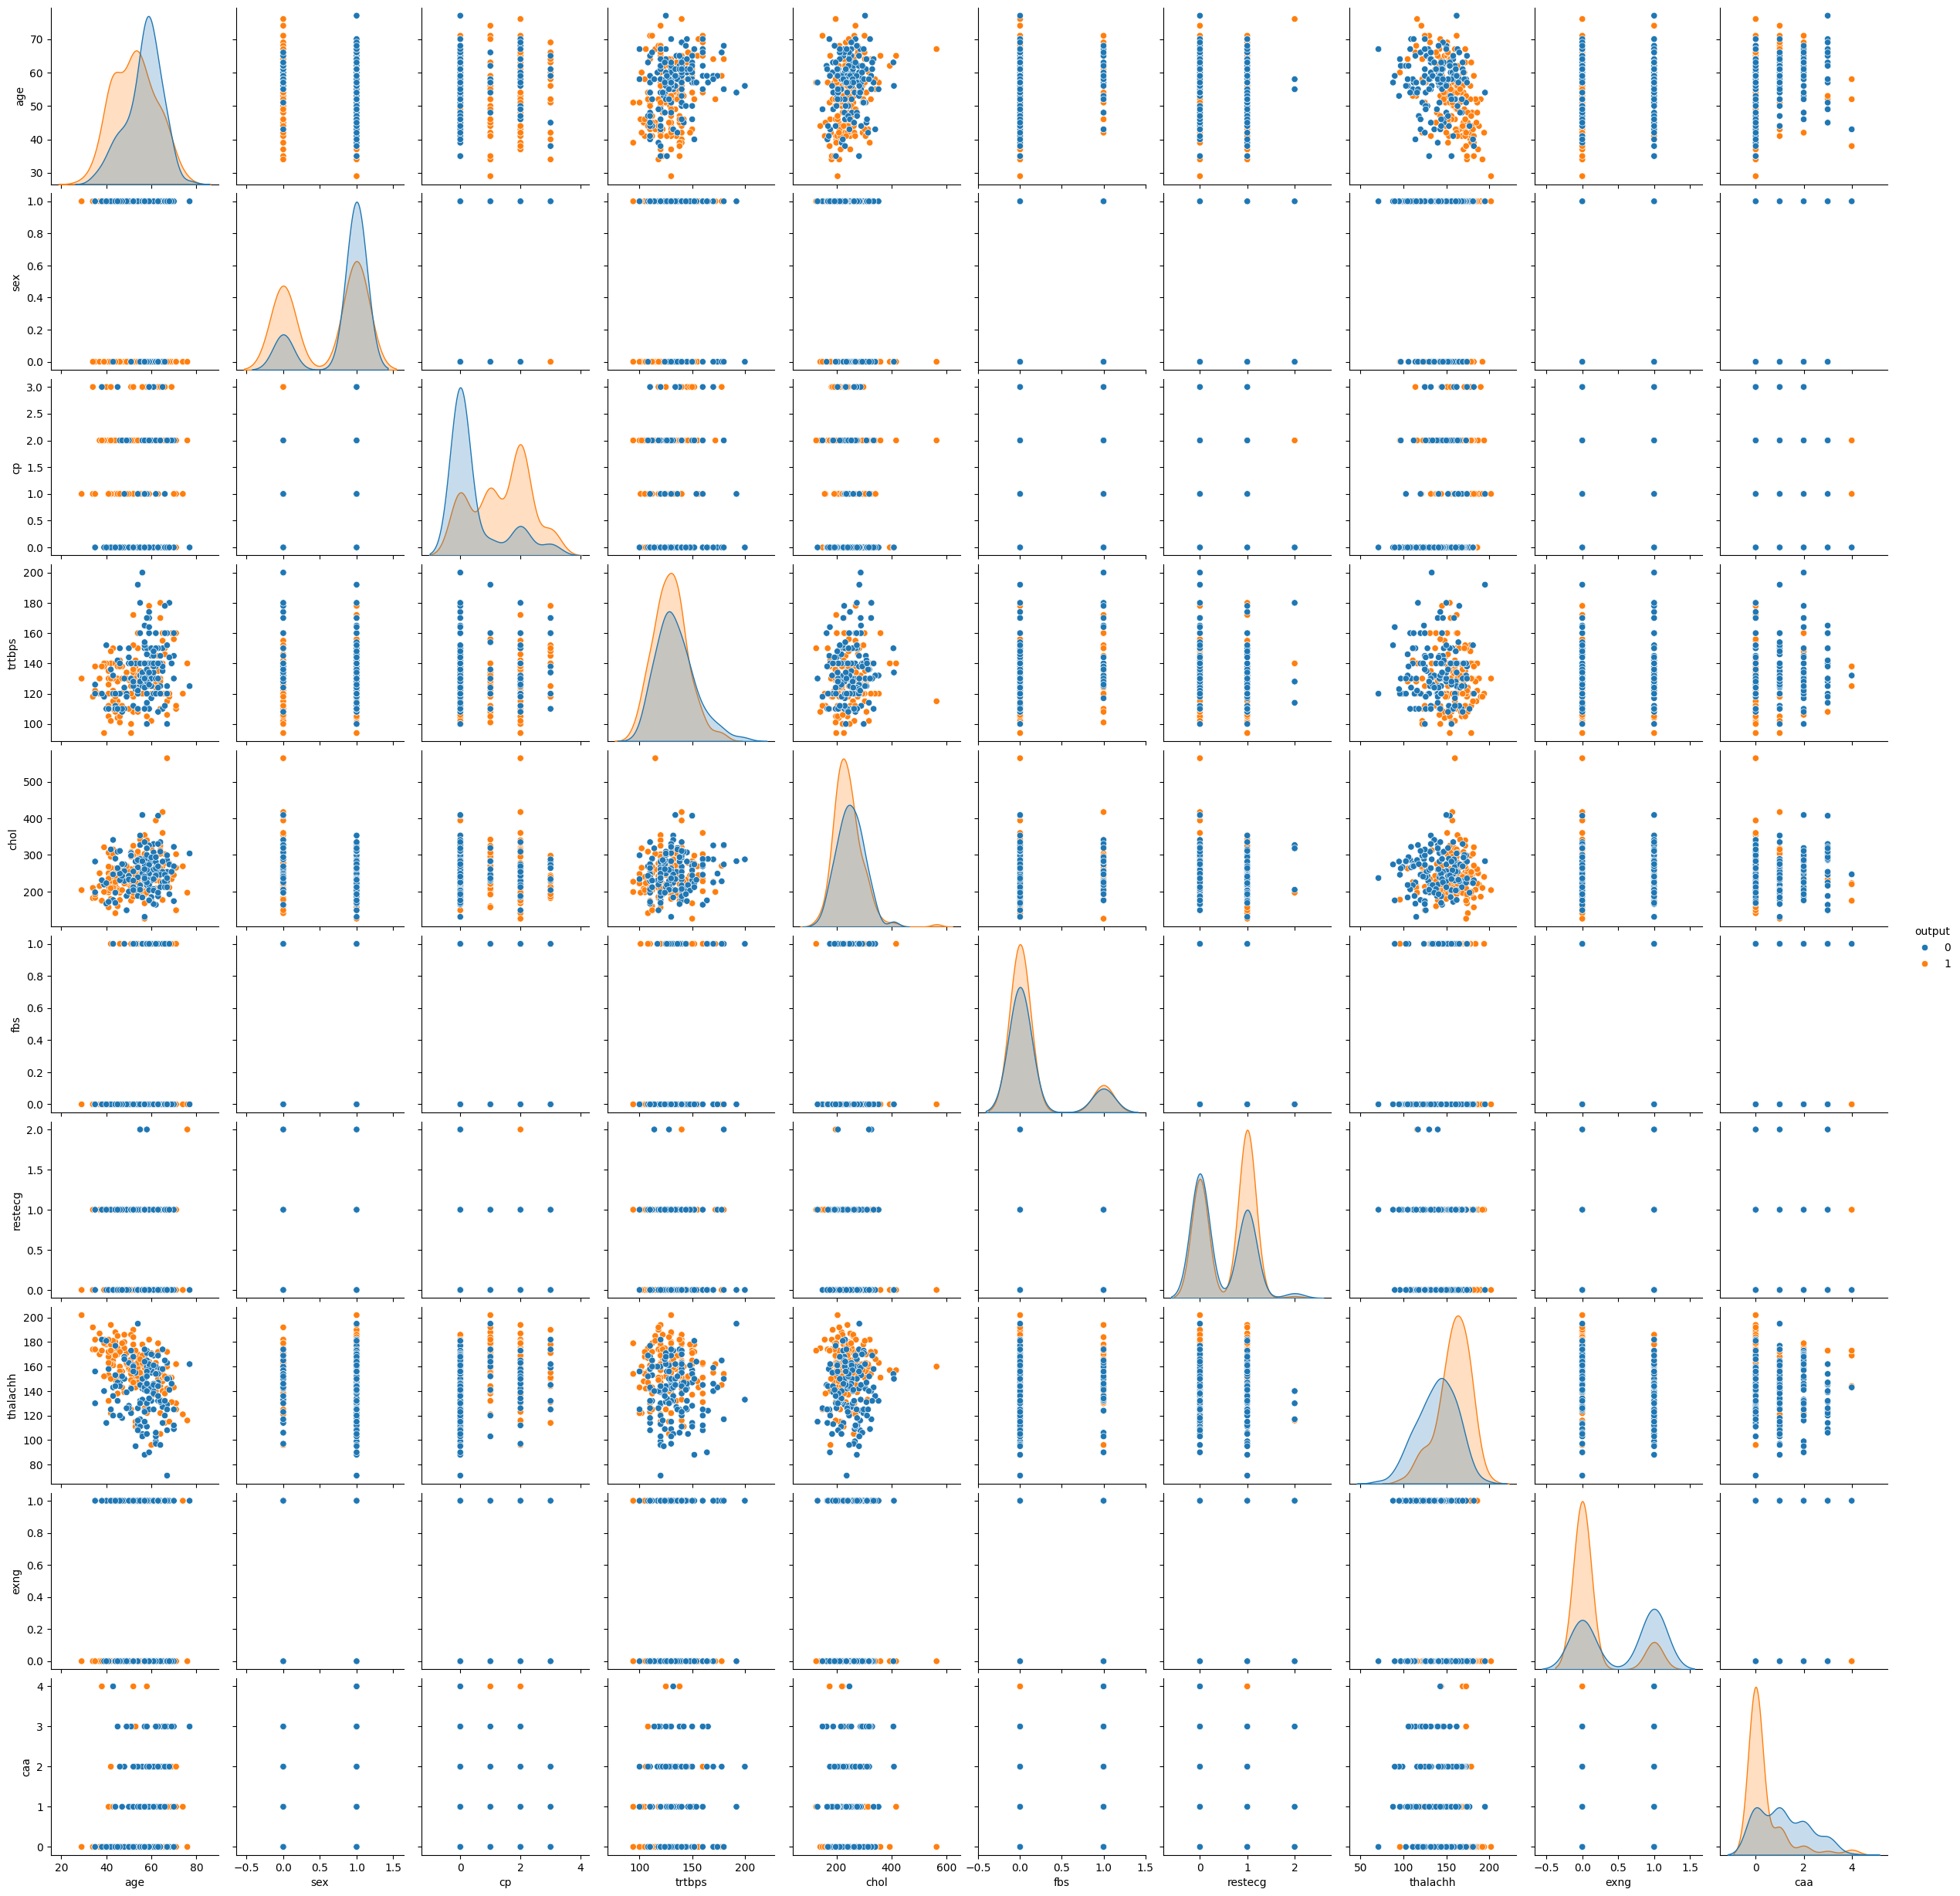

In [11]:
sns.pairplot(df, hue='output')

C:\Users\ttbon\AppData\Local\Temp\ipykernel_1160\1144681631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
C:\Users\ttbon\AppData\Local\Temp\ipykernel_1160\1144681631.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, col

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

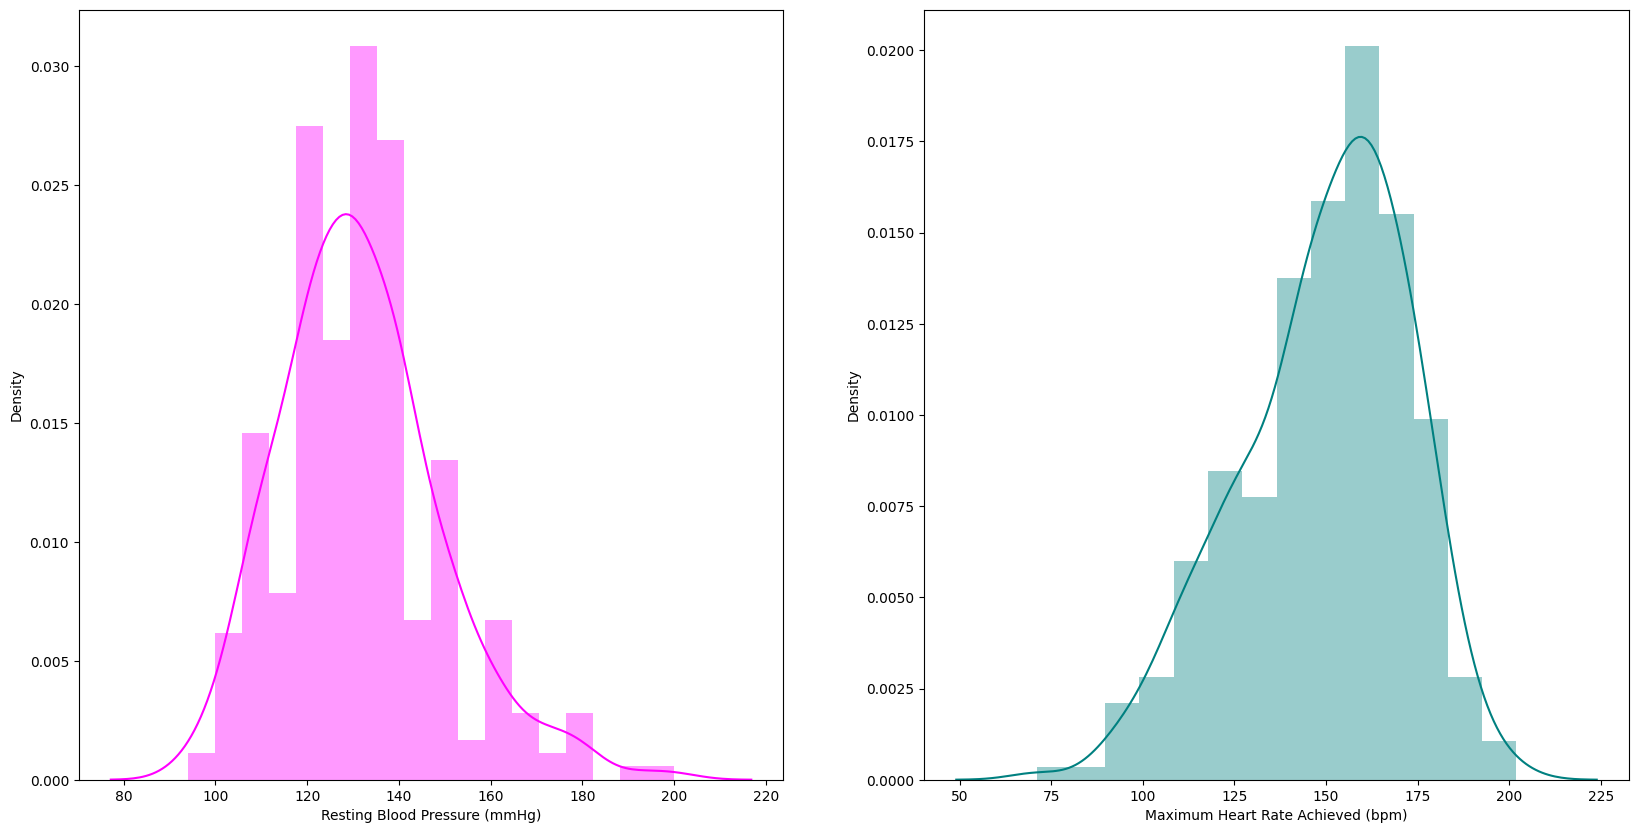

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

C:\Users\ttbon\AppData\Local\Temp\ipykernel_1160\195076517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

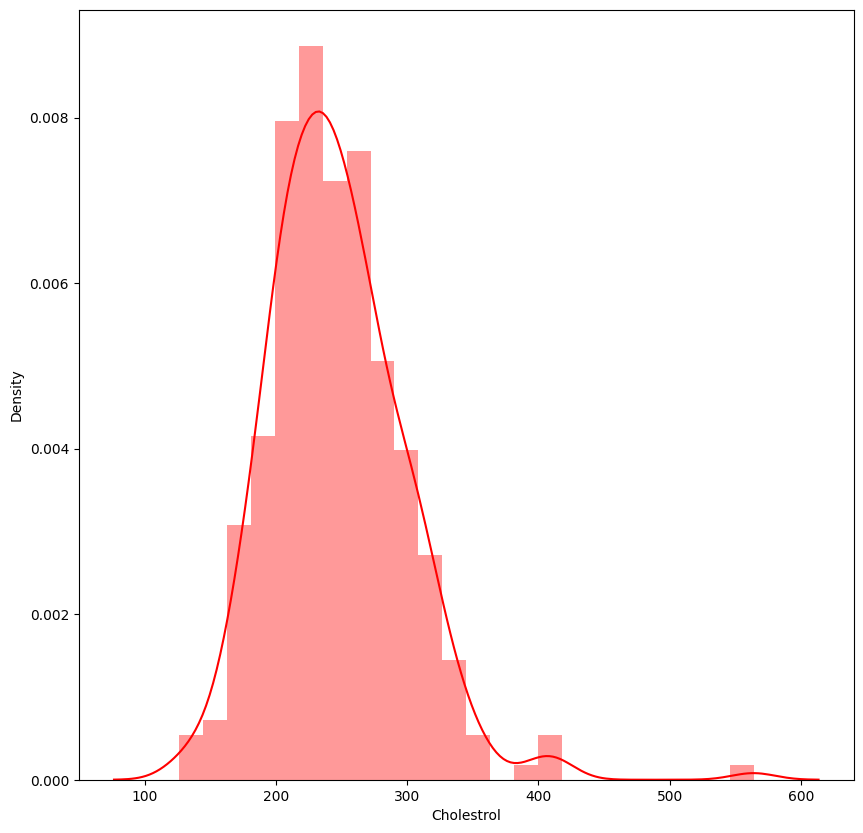

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [15]:

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit


<bound method StandardScaler.fit of StandardScaler()>

In [16]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [17]:
y= df.iloc[:,-1:]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
lbl= LabelEncoder()
encoded_y= lbl.fit_transform(y_train)
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
encoded_ytest= lbl.fit_transform(y_test)
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)
lr_conf_matrix
print(lr_acc_score*100,"%")

84.61538461538461 %


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train,encoded_y)
ypred2=tree.predict(x_test)
encoded_ytest= lbl.fit_transform(y_test)
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)
tree_conf_matrix
print(tree_acc_score*100,"%")

69.23076923076923 %


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,encoded_y)
ypred3 = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)
rf_conf_matrix
print(rf_acc_score*100,"%")

79.12087912087912 %


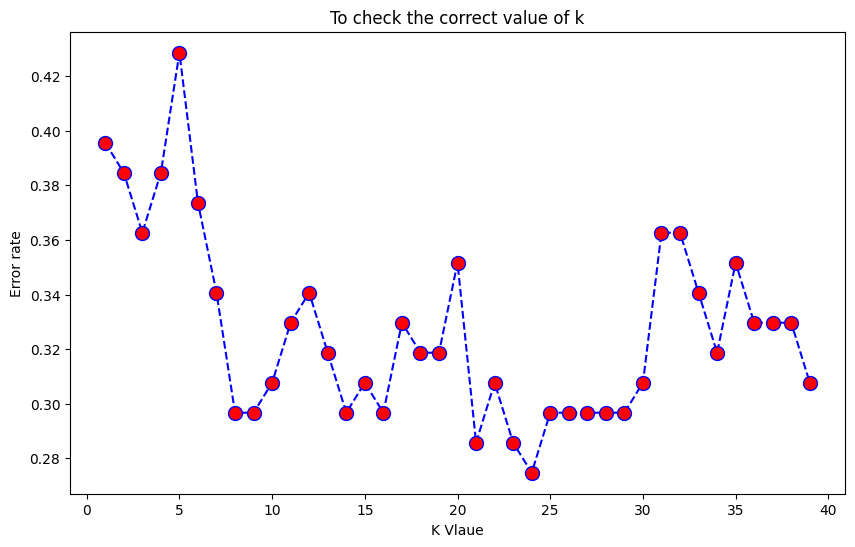

In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [32]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)
knn_conf_matrix
print(knn_acc_score*100,"%")

65.93406593406593 %


In [33]:
#SVM
from sklearn import svm
svm= svm.SVC()
svm.fit(x_train,encoded_y)
ypred5= svm.predict(x_test)
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)
svm_conf_matrix
print(svm_acc_score*100,"%")

67.03296703296702 %


In [34]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)
model_acc

,Model,Accuracy
0,Logistic Regression,84.615385
2,Random Forest,79.120879
1,Decision Tree,69.230769
4,SVM,67.032967
3,K Nearest Neighbor,65.934066


In [35]:
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)
adab.fit(x_train,encoded_y)
ypred6=adab.predict(x_test)
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)
adab_conf_matrix
print(adab_acc_score*100,"%")

c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


51.64835164835166 %


In [36]:
adab.score(x_train,encoded_y)
adab.score(x_test,encoded_ytest)

0.5164835164835165

In [37]:
#grid search cv
from sklearn.model_selection import GridSearchCV
model_acc
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}
grid1= GridSearchCV(LogisticRegression(),param_grid)
grid1.fit(x_train,encoded_y)
grid1.best_params_
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
logreg1.fit(x_train,encoded_y)
logreg_pred= logreg1.predict(x_test)
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)
logreg_pred_conf_matrix
print(logreg_pred_acc_score*100,"%")

c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn

74.72527472527473 %


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklea

In [38]:
#knn
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train,encoded_y)
grid_search.best_params_
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)
knn_pred_conf_matrix
print(knn_pred_acc_score*100,"%")

62.637362637362635 %


In [39]:
#SVM
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train,encoded_y)
grid_search.best_params_

{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}

In [40]:
from sklearn.svm import SVC
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')
svc.fit(x_train,encoded_y)
svm_pred= svc.predict(x_test)
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)
svm_pred_conf_matrix
print(svm_pred_acc_score*100,"%")

51.64835164835166 %


In [41]:
#logistic regression
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)
Y_pred1
lr_conf_matrix
print(lr_acc_score*100,"%")

84.61538461538461 %


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


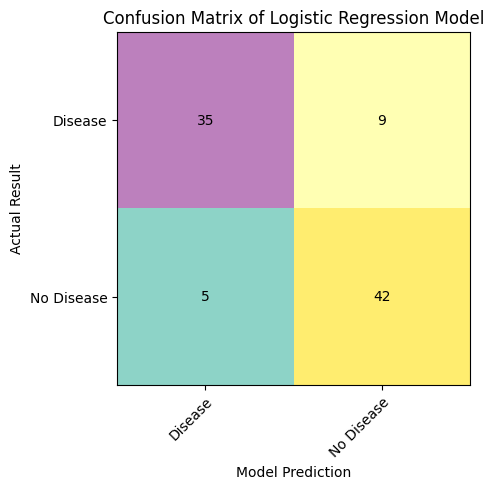

ACCURACY of our model is  84.61538461538461 %


In [42]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

In [43]:
import pickle
pickle.dump(logreg,open('heart.pkl','wb'))
df= pd.read_csv("heart.csv")
df.head()
x= df.iloc[:,:-1]
x
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y
import evalml
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')
evalml.problem_types.ProblemTypes.all_problem_types
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()


c:\Users\ttbon\Documents\heartattack_ml_eval\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 1.9674317836761475,
  'Total time of batch': 2.0939648151397705},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 0.8430397510528564,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.1734633445739746,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.3013246059417725,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 0.8246724605560303,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 0.8590109348297119,
  'Total time of batch': 5.59520959854126}}

In [44]:
automl.rankings
automl.best_pipeline
best_pipeline=automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])


**********************************************************************************
* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *
**********************************************************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']
4. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : sqrt
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.2 seconds

Cross Validation
----------------
             Lo

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

In [45]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 1.9447917938232422,
  'Total time of batch': 2.068869113922119}}

In [46]:
automl_auc.rankings
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************
* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *
*****************************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. RF Classifier Select From Model
	 * number_features : None
	 * n_estimators : 10
	 * max_depth : None
	 * percent_features : 0.5
	 * threshold : median
	 * n_jobs : -1
4. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.9 seconds

Cross Validation
----------------
         

In [47]:
best_pipeline_auc = automl_auc.best_pipeline
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')
final_model.predict_proba(X_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
